In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [53]:
human_emotion_df = pd.read_csv('drive/MyDrive/ML_Project_Sem5/Final_Submission/human_emotions_10.csv')
human_emotion_df.set_axis(['user_id','Location','Predicted_Label','Human_Mood_Score','Probabilties'],axis=1,inplace=True)

In [ ]:
user_playlist = pd.read_csv('drive/MyDrive/ML_Project_Sem5/Final_Submission/Users_with_fav_genre.csv')
songs_emotion = pd.read_csv('drive/MyDrive/ML_Project_Sem5/Final_Submission/songs_with_emotion_score.csv')

In [ ]:
def display_image(path):
  image_arr=[]
  a1 = cv2.imread(path)
  image = cv2.resize(a1, (224, 224))
  grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2_imshow(grayscale)
  print(image.shape)

In [ ]:
fav_genre_songs = songs_emotion[songs_emotion['Genre']=='rock']
fav_genre_songs = fav_genre_songs[fav_genre_songs['Happy_score']>=np.array(human_emotion_df['Human_Mood_Score'])[1]]

753

In [ ]:
songs_score = np.array(fav_genre_songs['Happy_score'])
songs_score = np.array(fav_genre_songs['Happy_score'])

753


User ID user_1
User image


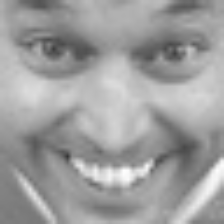

(224, 224, 3)
User favourite genre: rock
User human mood score: 1.0
You are already on the top of the world! Enjoy your life! Listen to any song of your choice!

User ID user_5
User image


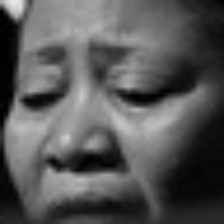

(224, 224, 3)
User favourite genre: rock
User human mood score: 0.015704870223999
listen to: 
Song: Hold Me Closer By: Elton John
Song: The Beach By: The Neighbourhood
Song: Rosemary By: Deftones
Song: What Once Was By: Her's
Song: Delusions of Saviour By: Slayer

User ID user_2
User image


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


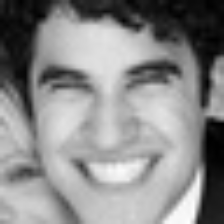

(224, 224, 3)
User favourite genre: rock
User human mood score: 0.999948501586914
You are already on the top of the world! Enjoy your life! Listen to any song of your choice!

User ID user_3
User image


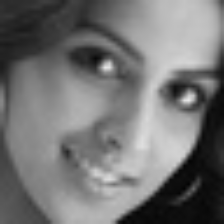

(224, 224, 3)
User favourite genre: rock
User human mood score: 0.8078723549842834
listen to: 
Song: Layla By: Derek & The Dominos
Song: Face Down By: The Red Jumpsuit Apparatus
Song: Thnks fr th Mmrs By: Fall Out Boy
Song: Everybody Talks By: Neon Trees
Song: Delusions of Saviour By: Slayer

User ID user_7
User image


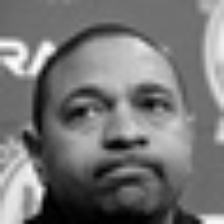

(224, 224, 3)
User favourite genre: rock
User human mood score: 0.0632794499397277
listen to: 
Song: Beverly Hills By: Weezer
Song: Don't Stop Believin' By: Journey
Song: Call Me By: Blondie
Song: Glory Days By: Bruce Springsteen
Song: Delusions of Saviour By: Slayer

User ID user_8
User image


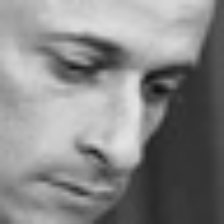

(224, 224, 3)
User favourite genre: rock
User human mood score: 0.1035561561584472
listen to: 
Song: Someday By: OneRepublic
Song: Thinking 'Bout You (feat. MacKenzie Porter) By: Dustin Lynch
Song: November Rain By: Guns N' Roses
Song: Talk Too Much By: COIN
Song: Delusions of Saviour By: Slayer

User ID user_6
User image


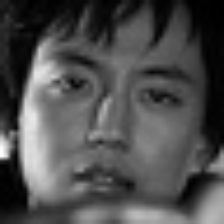

(224, 224, 3)
User favourite genre: rock
User human mood score: 0.0013471841812133
listen to: 
Song: All My Life By: Foo Fighters
Song: Paranoid - 2012 - Remaster By: Black Sabbath
Song: Sad But True (Remastered) By: Metallica
Song: What Once Was By: Her's
Song: Delusions of Saviour By: Slayer

User ID user_4
User image


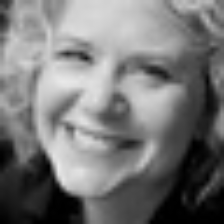

(224, 224, 3)
User favourite genre: rock
User human mood score: 0.9997826218605042
You are already on the top of the world! Enjoy your life! Listen to any song of your choice!

User ID user_10
User image


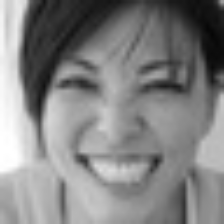

(224, 224, 3)
User favourite genre: rock
User human mood score: 1.0
You are already on the top of the world! Enjoy your life! Listen to any song of your choice!



In [54]:
for ind in human_emotion_df.index:

  user_id = 'user_'+str(human_emotion_df.user_id[ind])
  print('User ID',user_id)
  print('User image')
  
  #display user image
  display_image(str(human_emotion_df.Location[ind]))

  #user info
  fav_genre = np.array(user_playlist[user_playlist['User ID']=='user_1']['Fav Genre'])[0]
  print('User favourite genre:',fav_genre)
  human_mood_score = np.array(human_emotion_df['Human_Mood_Score'])[ind]
  print('User human mood score:', human_mood_score)

  #recommender
  fav_genre_songs = songs_emotion[songs_emotion['Genre']==fav_genre]
  fav_genre_songs = fav_genre_songs[fav_genre_songs['Happy_score']>=human_mood_score]
  fav_genre_songs.sort_values(by=['Happy_score'], inplace=True)
  if(len(fav_genre_songs)==0):
    print('You are already on the top of the world! Enjoy your life! Listen to any song of your choice!')
    print()
    continue
  songs_score = np.array(fav_genre_songs['Happy_score'])
  max_score = max(songs_score)
  temp = (max_score - human_mood_score)/5
  playlist = []
  for i in range(5):
    temp_score = human_mood_score + (i+1)*temp
    z = fav_genre_songs.iloc[(fav_genre_songs['Happy_score']-temp_score).abs().argsort()[:2]]
    z.sort_values(by=['Happy_score'], inplace=True)
    playlist.append([z.iloc[0]['Song Name'], z.iloc[0]['Artist Name']])

  #songs recommended
  print('listen to: ')
  for s in playlist:
    print('Song:',s[0],'By:',s[1])
  print()